# Probability


It is about determining the likelihood of an event.

- [Glossary](#glossary)
- [Addition rule](#addition-rule)
- [Multiplication rule](#multiplication-rule)
- [Types of probability distribution functions](#types-of-probability-distribution-functions)


In [1]:
!uv pip install -q\
    numpy==2.3.2 \
    matplotlib==3.10.6 \
    scipy==1.16.2

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

## Glossary

- $\cup$: Or
- $\cap$: And

For example let's consider the probability of flipping a coin with the results of head or tail:

$P(\text{Heads}) = \frac{1}{2}, \quad P(\text{Tails}) = \frac{1}{2}$

Or rolling a dice:

$P(1) = P(2) = P(3) = P(4) = P(5) = P(6) = \frac{1}{6}$

## Addition rule

### Mutual exclusive event

Two events are mutual exclusive if they cannot happen at same time. For example when tossing a coin is not possible to get head and tail at same time, so they are _mutual exclusive_.

$P(H \cup T) = P(H) + P(T) =\frac{1}{2} + \frac{1}{2} = 1$

### Non Mutual exclusive event

What is the probability of taking a card from the deck to be King or Hearth? The card can be the combination of both King and Hearth

#### Single Card: King of Hearts

$P(\text{King of Hearts}) = \frac{1}{52}$

#### Addition Rule / Union of Events

Probability of drawing a King or a Heart:

- Let $(A = \text{King} \Rightarrow 4/52)$
- Let $(B = \text{Heart} \Rightarrow 13/52)$
- Overlap $(A \cap B = \text{King of Hearts} \Rightarrow 1/52)$

Union formula:

$P(A \cup B) = P(A) + P(B) - P(A \cap B)$

Apply to King or Heart:

$P(\text{King or Heart}) = \frac{4}{52} + \frac{13}{52} - \frac{1}{52} = \frac{16}{52} = \frac{4}{13}$

## Multiplication rule

### Independent events

What is the probability of getting Head and then Tail when flipping a coin?

$P(H \cap T) = P(H) + P(T) =\frac{1}{2} * \frac{1}{2} = \frac{1}{4}$

### Dependent events

What is the probability of taking a King card then a Queen card on a deck?

$P(K \cap Q) = P(K) * P(\frac{Q}{K}) =\frac{4}{52} * \frac{4}{51}$

- Conditional probability
- used on _Naive Bayes_ algorithm

## Probability Distribution Functions

Describe how the probabilities are distributed over the values of a random variable.


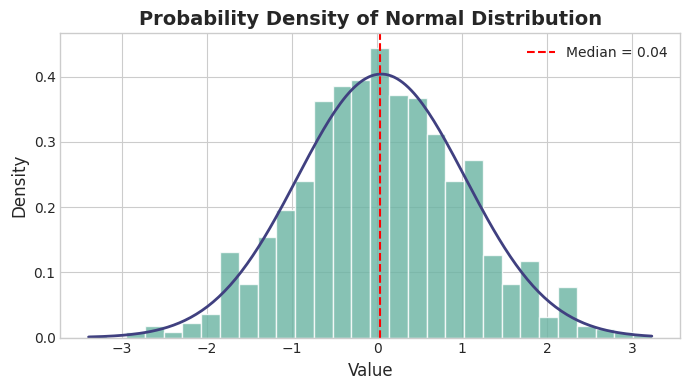

In [ ]:
data = np.random.randn(1000)

plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(7, 4))

count, bins, _ = plt.hist(
    data, bins=30, density=True, color="#69b3a2", edgecolor="white", alpha=0.8
)

x = np.linspace(bins[0], bins[-1], 200)
plt.plot(x, norm.pdf(x, np.mean(data), np.std(data)), color="#404080", lw=2)

plt.axvline(
    np.median(data),
    color="red",
    linestyle="--",
    lw=1.5,
    label=f"Median = {np.median(data):.2f}",
)

plt.title(
    "Probability Density of Normal Distribution", fontsize=14, weight="bold"
)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

### Types of probability distribution functions

- [Probability Mass Function PMF](probability-mass-function-pmf)
- [Cumulative Density Function CDF](#cumulative-density-function-cdf)
- [Probability Density Function PDF](probability-density-function-pdf)


#### Probability Mass Function PMF

$PMF = p^k * (1 - p)^{1-k}$

if $k = 0$ then $q = 1 - p$

if $k = 1$ then $p$

Defines the probability that a discrete random variable takes on a specific value.

for example rolling a dice:

$P(1) = P(2) = P(3) = P(4) = P(5) = P(6) = \frac{1}{6}$


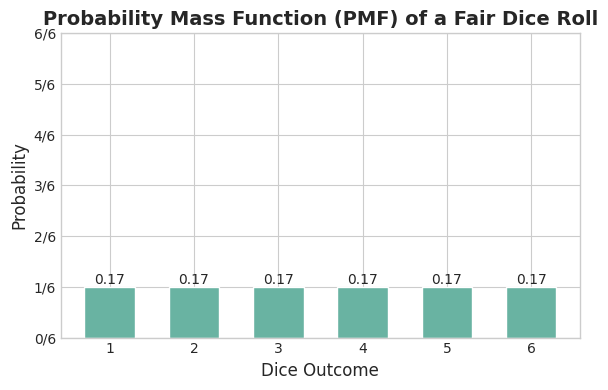

In [ ]:
x = np.arange(1, 7)
p = np.full(6, 1 / 6)  # Equal probability for each outcome

plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(6, 4))

plt.bar(x, p, color="#69b3a2", edgecolor="white", width=0.6)

for xi, pi in zip(x, p):
    plt.text(xi, pi + 0.01, f"{pi:.2f}", ha="center", fontsize=10)

plt.title(
    "Probability Mass Function (PMF) of a Fair Dice Roll",
    fontsize=14,
    weight="bold",
)
plt.xlabel("Dice Outcome", fontsize=12)
plt.ylabel("Probability", fontsize=12)

plt.yticks(np.arange(0, 1.1, 1 / 6), [f"{i}/6" for i in range(7)])

plt.tight_layout()
plt.show()

#### Cumulative Density Function CDF

Here we can ask what is the probability of getting a value less or equal two throwing the dice. So we sum the probability of the number 1 and the probability of number 2, this is why is cumulative.


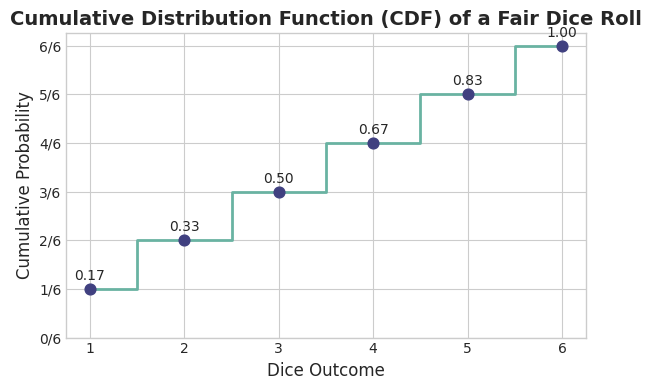

In [ ]:
x = np.arange(1, 7)
p = np.full(6, 1 / 6)

cdf = np.cumsum(p)

plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(6, 4))

plt.step(x, cdf, where="mid", color="#69b3a2", linewidth=2)
plt.scatter(x, cdf, color="#404080", s=60, zorder=3)

for xi, fi in zip(x, cdf):
    plt.text(xi, fi + 0.03, f"{fi:.2f}", ha="center", fontsize=10)

plt.title(
    "Cumulative Distribution Function (CDF) of a Fair Dice Roll",
    fontsize=14,
    weight="bold",
)
plt.xlabel("Dice Outcome", fontsize=12)
plt.ylabel("Cumulative Probability", fontsize=12)

plt.yticks(np.arange(0, 1.1, 1 / 6), [f"{i}/6" for i in range(7)])

plt.tight_layout()
plt.show()

#### Probability Density Function PDF

Used for continuous random variable.

- Non negative
- The total area under the PDF curve is equal to 1


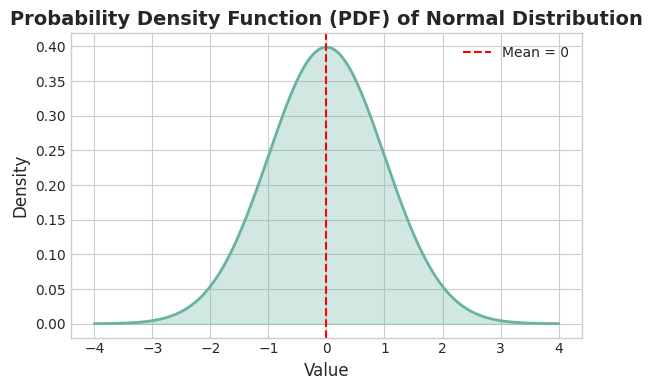

In [ ]:
x = np.linspace(-4, 4, 200)
pdf = norm.pdf(x, loc=0, scale=1)  # mean=0, std=1

plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(6, 4))

plt.plot(x, pdf, color="#69b3a2", lw=2)
plt.fill_between(x, pdf, color="#69b3a2", alpha=0.3)

plt.axvline(0, color="red", linestyle="--", lw=1.5, label="Mean = 0")

plt.title(
    "Probability Density Function (PDF) of Normal Distribution",
    fontsize=14,
    weight="bold",
)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

## Types of probability distribution

### Bernoulli Distribution

The Bernoulli distribution is the simplest discrete probability distribution. It represents the probability distribution of a random variable that has exactly two possible outcomes: success(with probability p) and failure (with probability 1 - p). It is used to model binary outcomes, such as coin flip or a yes/no question.

Outcomes are binary, like tossing a coin. To construct the distribution we must use a [PMF](#probability-mass-function-pmf) because the output is binary so is a discrete random variable.

$p = P_x(x=Head) = 0.5$

$q = P_x(x=Tail) = 1- 0.5 = 1 - p$

Or passing on a test:

$p = P_x(x=Pass) = 0.4$

$q = P_x(x=Fail) = 1- 0.4 = 0.6$

#### Mean

$F(x) =\sum_{k=0}^1 k \cdot p(k)$

$E[X] = (0 \cdot P(X = 0)) + (1 \cdot P(X = 1)) = (0 \cdot q) + (1 \cdot p) = p$

Where:

- $k = \{0, 1\}$
- $p=0.6$
- $q=0.4$

Then:

$0 \cdot 0.4 + 1 \cdot 0.6 = 0.6 = p$

#### Median

- median = 0 if q > p
- median = 0.5 if q = p
- median = 1 if q < p

#### Mode

- mode = p if p > q
- mode = q if not p > q

#### Variance

How far is the observation ($k$) from the mean ($p$)

- $k = \{0, 1\}$
- $\mu = p = 0.6$

$0.4 \cdot (0 - 0.6)^2 + 0.6(1 - 0.6)^2$


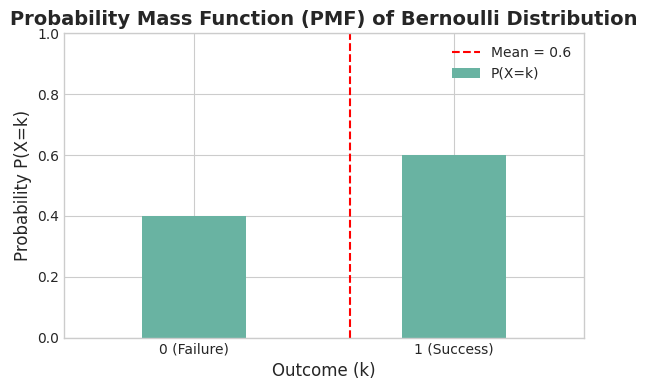

In [ ]:
p = 0.6
q = 1 - p
outcomes = [0, 1]
probabilities = [q, p]

mean = p

plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(6, 4))

plt.bar(
    outcomes,
    probabilities,
    color="#69b3a2",
    width=0.4,
    label="P(X=k)",
)

plt.axvline(
    mean, color="red", linestyle="--", lw=1.5, label=f"Mean = {mean:.1f}"
)

plt.title(
    "Probability Mass Function (PMF) of Bernoulli Distribution",
    fontsize=14,
    weight="bold",
)
plt.xlabel("Outcome (k)", fontsize=12)
plt.ylabel("Probability P(X=k)", fontsize=12)

plt.xticks(outcomes, ["0 (Failure)", "1 (Success)"])

plt.xlim(-0.5, 1.5)
plt.ylim(0, 1.0)

plt.legend()
plt.tight_layout()

plt.show()

### Binomial Distribution

Used for discrete random variables

[PMF](#probability-mass-function-pmf)

### Normal or Gaussian Distribution

[PDF](#probability-density-function-pdf)

### Poisson Distribution

[PMF](#probability-mass-function-pmf)

### log Normal Distribution

[PDF](#probability-density-function-pdf)

### Uniform Distribution

[PMF](#probability-mass-function-pmf)
